# <div dir=rtl> תרגול שביעי - SVM, Validation, Cross-Validation </div>
<div dir=rtl>
    בתרגול זה נכיר כלי נוסף בעולם הלמידה המפוקחת ונלמד איך לבחון את עצמינו יותר טוב.
</div>

## <div dir=rtl>שאלה 1</div>

<div dir=rtl>
    בשנת 2008 פרסם הNIH האמריקאי מידע על אודות 4238 תושבי העיר פארמינגהם במדינת מסצ'וסטס. <br />
    המידע כלל נתונים על בריאותם של המשתתפים במחקר והאם בתוך עשור המשתתפים זוהו כסובלים ממחלות בכלי הדם הכליליים בלב. המידע זמין בקובץ 6_heart_disease_2.csv. <br />
</div>
<div dir=rtl style='background-color: #fcf2f2;'> 
    הערה: הדאטאסט אמיתי וניתן להורדה בצורה חופשייה. הנתונים בו שונו לצורך הדוגמה. <br />
</div><br />
<div dir=rtl>
    א. טענו את הקובץ לאובייקט מסוג DataFrame.
</div>

In [1]:
%ls

6_heart_disease_2.csv* 7_recitation_7.html*   7_recitation_7.ipynb*


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import metrics


In [3]:
df = pd.read_csv('6_heart_disease_2.csv')
df.sample(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
31,1,43,4.0,1,43.0,0.0,0,0,0,226.0,115.0,85.5,27.57,75.0,75.0,0
1079,0,67,1.0,0,0.0,1.0,0,1,0,263.0,241.0,93.0,30.04,75.0,78.0,1
4041,0,56,2.0,0,0.0,0.0,0,1,0,199.0,160.0,105.0,25.71,75.0,83.0,0
3416,0,53,4.0,0,0.0,0.0,0,0,0,219.0,108.0,65.0,22.19,70.0,76.0,0
1805,1,59,3.0,1,20.0,0.0,0,0,0,238.0,152.5,75.5,26.42,58.0,67.0,1


<div dir=rtl>
    ב. בתרגול קודם הכרנו את כלל הפיצ'רים בדאטא סט והתרשמנו כי לחץ הדם הסיסטולי ולחץ הדם הדיאסטולי מהווים מדדים המפרידים במידה מסוימת בין המטופלים החולים והבריאים. <br />
    בתרגול הקודם התאמנו מודל לוגיסטי לכל הנתונים יחד וחישבנו את מדד הדיוק <br />
</div>
<br />

\begin{align}
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}\\
\end{align}
<br />

<div dir=rtl>
    ראינו בתרגול הקודם שהפרדה גם בעזרת שני פיצ׳רים לא כל כך אינפורמטיבים (BMI ודופק) עדיין נתנו ציון דיוק גבוה, מעל 0.8. למה זה קורה?<br />
    ננסה להבין זאת ע״י דוגמה - נניח שיש לנו דאטה סט שמכיל 1000 תצפיות שמסומנות כ-0 ו10 תצפיות שמסומנת כ-1. <br />
    בנוסף נניח שיש לנו מודל קלאסיפיקציה ״מנוון״, כלומר לכל התצפיות המודל נותן את הפרדיקציה 0. מה יהיה ציון הדיוק?
</div>

In [4]:
y_true = np.concatenate((np.zeros(1000), np.ones(10)))
y_pred = np.zeros(y_true.shape[0])

metrics.accuracy_score(y_true, y_pred)

0.9900990099009901

<div dir=rtl>
    אבל המודל הזה ממש לא מודל טוב....אם נשים לב במודל הגרוע ביותר אנחנו נקבל שמדד הדיוק שווה ליחס בין כמות התצפיות של הקבוצה הגדולה ביותר לכל הדאטה סט - הTN תמיד יהיה מספר מאוד גדול! כי הדאטה ממש לא מאוזן <br />
    נתבונן בעוד שני מדדי דיוק - <code>precision</code> ו - <code>recall</code>
</div>
<br />

\begin{align}
Precision = \frac{TP}{TP+FP}\\
    Recall = \frac{TP}{TP+FN}\\
\end{align}
<br />
<div dir=rtl>
    מדד ה- <code>precision</code> מתאר כמה המודל מסווג טוב דוגמאות למחלקה החיובית (1) כלומר כמה תצפיות מתוך כל התצפיות שהכרזנו עליהן כחיוביות אכן חיוביות<br />
    מדד ה- <code>recall</code>, ידוע גם כ sensitivity מתאר כמה המודל מצליח לסווג נכונה את המחלקה החיובית מתוך סך כל ההופעות שלה בדאטה. 
</div>

In [5]:
print(metrics.precision_score(y_true, y_pred))
print(metrics.recall_score(y_true, y_pred))

0.0
0.0


/Users/daniellemiller/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<div dir=rtl>
        בדקו האם הדאטה מאוזן או לא 
</div>

In [6]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'axes.grid':True,
         'axes.grid.which':'both'
         }
plt.rcParams.update(params)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

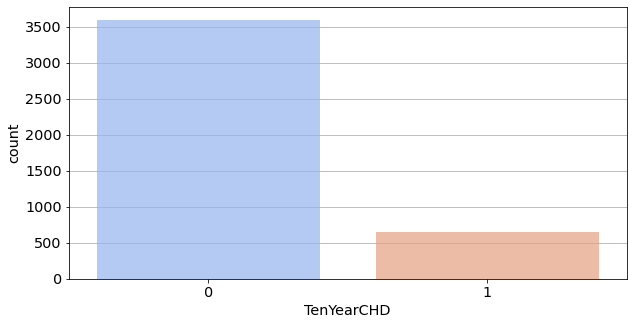

In [7]:
sns.countplot(x=df['TenYearCHD'], palette='coolwarm')
# shorter but the same as df['TenYearCHD'].value_counts().plot(kind='bar')


<div dir=rtl>
    ג. צרו חלוקה ברשומות כך שבקבוצה אחת יפלו 80% מהדוגמאות, ושאר הדוגמאות בקבוצה השניה. שימו לב שעליכם לחלק את הרשומות כך שהתפלגות המחלקות תישאר זהה בכל קבוצה.
</div>
<br />

<div dir=rtl>
    ראשית ננסה להבין מה התפלגות המחלקות בנתונים:
</div>

In [8]:
pd.DataFrame(
    df['TenYearCHD'].value_counts(normalize=True)
)

,TenYearCHD
0,0.848042
1,0.151958


<div dir=rtl>
    קבלנו שרוב הנתונים מגיעים מנבדקים בריאים - יש הטייה חזקה בדאטא לטובת המחלקה הזו. נשים לב שאם נבחר באקראי רשומות לכל קבוצה (אנחנו רוצים שתי קבוצות) החלוקה עלולה להיות כזו שמחלקה אחת תהיה מיוצגת בצורה לא טובה - או בייצוג חסר או בייצוג יתר. אנחנו רוצים לדאוג לכך שגם אחרי החלוקה לשתי קבוצות ההתפלגות תישמר 85-15.
    <br />
    אמנם ניתן לממש זאת בעצמינו, אבל למזלינו מימוש מוכן ובדוק כבר קיים:
</div>

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_val = train_test_split(
    df[['sysBP','diaBP', 'TenYearCHD']],
    train_size=0.8,
    stratify=df['TenYearCHD']
)
pd.DataFrame(x_train['TenYearCHD'].value_counts(normalize=True)),\
pd.DataFrame(x_val['TenYearCHD'].value_counts(normalize=True))

(   TenYearCHD
 0    0.848083
 1    0.151917,
    TenYearCHD
 0    0.847877
 1    0.152123)

<div dir=rtl>
    נשים לב לפרמטר stratify (מאנגלית: סטרטיפיקציה - יצרת שכבות). הוא מנחה את הפונקציה לחלק את הנתונים לפי הלייבלים הנתונים לו. אכן בהסתכלות על ההתפלגות בכל קבוצה - מקבלים שהתפלגות הלייבלים נשמרה כמו במקור בדיוק גבוה.
</div>
<br />
<div dir=rtl>
    ד. צרו מודל לינארי לסיווג הנתונים לשתי מחלקות אשר ממקסם את המרחק בין שתי המחלקות והישר המפריד. יש ללמוד מהקבוצה הגדולה (זו שסומנה ב train)
</div>
<br />
<br />
<div dir=rtl>
    בדיוק לשם כך נוצר ה Support Vector Machine. <br />
    מדובר במודל אשר מתאים מפריד לינארי (קו ישר, מישור או מישור במימד גבוה) ואך ורק לינארי. בתהליך האימון המודל מתחשב במרחק בין הישר המפריד לדוגמאות הקרובות ביותר אליו מכל מחלקה (אלה ווקטורי התמך) ומעביר את הישר בניהם.

</div>

<div dir=rtl>
    את שתי המחלקות נסמן באופן הבא $y_i \in \{-1,1\}$ והמטרה שלנו היא למצוא ישר או מישור שמפריד בצורה הטובה ביותר את הנקודות של שתי המחלקות. <br />
    כלומר, נרצה שהפרדיקציות יהיו בעלות אותו הסימן :
</div>

\begin{align}
y_i(w^T \cdot x_i - b) ֿ\geq 1\\\forall i, 1 \leq i \leq n\\
\end{align}

<br /><br />
<div dir=rtl>
    הבעיה בדוגמה הזו היא שהדאטה לא תמיד יהיה ניתן להפרדה מושלמת ע״י קו לינארי. בשביל לאפשר יותר גמישות באלגוריתם נסתמך על soft-SVM שמאפשר סטייה מההפרדה הלינארית המושלמת ובעצם ״מעניש״ נקודות שמעבר לקו.<br />
    הפונקציה שנשתמש בה במקרה זה נקראת גם <code>hinge loss</code> והיא מקבלת את הערך 0 כאשר הנקודה נמצאת בצד הנכון של הישר, אחרת ערך הפרופורציונאלי למרחק של הנקודה מהישר
</div>


\begin{align}
l_i = \max(0, 1 - y_i(w^T \cdot x_i - b))\\
L = \dfrac{1}{n} \sum_{n} l_n + \lambda \cdot ||w||^2
\end{align}

<div dir=rtl>
    הפרמטר $\lambda$ מגדיר את גודל הרגולריזציה והוא עוזר למודל להתכנס במצבים בהם יש "רעש" והדגימות לא מופרדות בצורה מושלמת על ידי ישר. הוא מאזן בין ערך ה- <code>loss</code> לבין גודל השוליים 
</div>


![](https://upload.wikimedia.org/wikipedia/commons/b/b5/Hinge_loss_vs_zero_one_loss.svg)
<br />

<div dir=rtl>
    בכחלון מימין - פונקצית ה hinge loss. בירוק - פונקצית ה 0-1 loss.<br />
    ציר ה-x מתאר את המרחק מגבול ההחלטה, כאשר x שלילי מדובר בתצפית שנפלה בצד הלא נכון של הקו ולכן ה loss עבורה יהיה גבוה.

</div>






<div dir=rtl>
    צרו תרשים פיזור של שני הפיצ׳רים: sysBP, diaBP
</div>


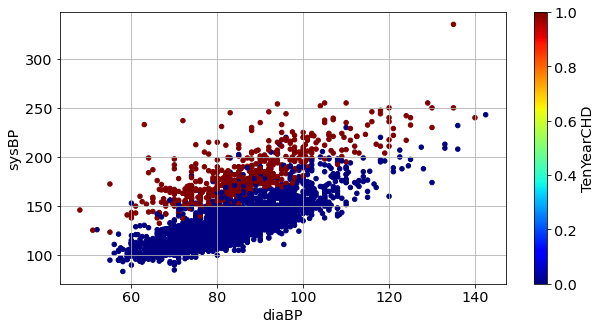

In [10]:
boxp = x_train[['sysBP','diaBP','TenYearCHD']].plot.scatter(
    x='diaBP',
    y='sysBP',
    c='TenYearCHD',
    cmap='jet',
    sharex=False
)

<div dir=rtl>
    כעת נתאים מודל SVM עבור קלסיפיקציה:
</div>

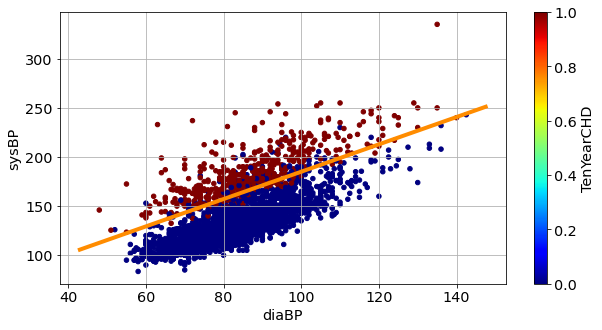

In [11]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(
    x_train[['diaBP','sysBP']], 
    x_train['TenYearCHD']
)


boxp = x_train[['sysBP','diaBP','TenYearCHD']].plot.scatter(
    x='diaBP',
    y='sysBP',
    c='TenYearCHD',
    cmap='jet',
    sharex=False
)

def decision_boundary_plot(results, min_x, max_x):
    # get the separating hyperplane
    w = results.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (results.intercept_[0]) / w[1]
    plt.plot(xx, yy, c='darkorange', lw=4)



decision_boundary_plot(svc, x_train['diaBP'].min(), x_train['diaBP'].max())

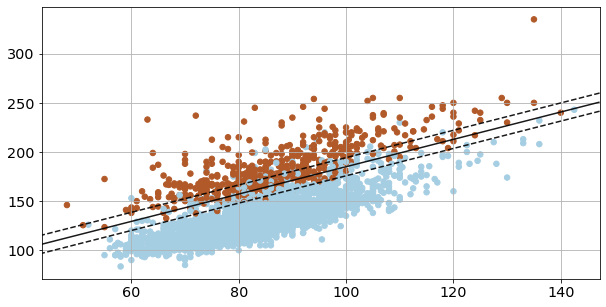

In [12]:
# this is the same plot but now showing support vectors
plt.scatter(x_train['diaBP'], x_train['sysBP'], c=x_train['TenYearCHD'], s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svc.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(
    XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.9, linestyles=["--", "-", "--"]
)

<div dir=rtl>
    ה. בחנו את ביצועי המודל הן על הקבוצת האימון והן על קבוצת הוולידציה.
</div>

In [13]:
metrics.accuracy_score(
    x_train['TenYearCHD'],
    svc.predict(x_train[['diaBP','sysBP']])
)

0.9539823008849557

In [14]:
metrics.accuracy_score(
    x_val['TenYearCHD'],
    svc.predict(x_val[['diaBP','sysBP']])
)

0.9563679245283019

<div dir=rtl>
    באופן צפוי - קיבלנו ביצועים פחות טובים על קבוצת הוולידציה מאשר על קבוצת האימון (אבל - זה לא חד משמעי). זה יכול לנבוע ממגוון סיבות - רעש בדוגמאות שבחרנו ללמידה, רעש בוולידציה, בחירה לא מוצלחת של נקודות ועוד.
    <br />
</div>
<br />
<div dir=rtl>
    ו. חיזרו על התהליך.
</div>

In [15]:
x_train, x_val = train_test_split(
    df[['sysBP','diaBP', 'TenYearCHD']],
    train_size=0.8,
    stratify=df['TenYearCHD']
)

svc = SVC(kernel='linear')
svc.fit(
    x_train[['diaBP','sysBP']], 
    x_train['TenYearCHD']
)

metrics.accuracy_score(
    x_val['TenYearCHD'],
    svc.predict(x_val[['diaBP','sysBP']])
)

0.9599056603773585

<div dir=rtl>
    למעשה אנחנו רואים שבחלוקות חוזרות ונשנות של הדאטא מקבלים נתונים שונים. נשאלות כעת השאלות: איך נבחר את הפרמטרים האופטימליים של המודל בצורה אמינה? על אילו נתונים נדווח?
</div>
<br />
<br />
<div dir=rtl>
    ז. חלקו את הנתונים לחמש חלוקות 80-20 ייחודיות וזרות אחת לשניה ואמנו מודל על כל חלוקה. ביחרו על בסיס זה את חוזק הרגולריזציה.
</div>
<br />
<div dir=rtl>
    כעת נכיר את מושג הקרוס-וולידציה. בשיטה זה משתמשים בכל הדאטא לאימון (למעט קבוצת מבחן בה לא נוגעים עד השלב האחרון). בכל סבב מאמנים מודל אחר ובודקים את התוצאות שלו.
    <br />
    קרוס וולידציה היא צורה אמינה יותר לדיווח על תוצאות משום שמבטלת את החלוקה כגורם המשפיע על המודל.
    <br />
    אמנם לא מסובך לממש זאת בעצמינו, אבל למזלינו קיים מימוש מוכן ובדוק.
</div>

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

![](7_cross_validation.png)

In [16]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=5)

svc = SVC(kernel='linear')
scores = cross_val_score(
    svc,
    df[['sysBP', 'diaBP']],
    df['TenYearCHD'],
    cv=skf
)
scores

array([0.95518868, 0.9504717 , 0.95165094, 0.95041322, 0.96458087])

<div dir=rtl>
    נשים לב למעלה שקיבלנו 5 מספרים - חמישה ערכי דיוק. עוד נשים לב שהמודל בו אנחנו משתמשים, svc, הוא מודל שהחבילה "יודעת" לעבוד איתו, לכן התהליך כולו אוטומטי.
    <br />
    כעת, תוך שימוש בשיטה הזו נבחר פרמטר C מתאים:
</div>

In [17]:
regularization_strength = [1e-5, 1e-4, 1e-3 ,0.01, 0.1, 1]

results = pd.DataFrame(
    [],
    columns=regularization_strength
)

for strength in regularization_strength:
    skf = StratifiedKFold(n_splits=5)
    svc = SVC(kernel='linear', C=strength)
    scores = cross_val_score(
        svc,
        df[['sysBP', 'diaBP']],
        df['TenYearCHD'],
        cv=skf
    )
    
    results.loc[:,strength] = scores
    
results

,0.00001,0.00010,0.00100,0.01000,0.10000,1.00000
0,0.926887,0.954009,0.956368,0.955189,0.955189,0.955189
1,0.928066,0.950472,0.950472,0.950472,0.950472,0.950472
2,0.923349,0.948113,0.951651,0.951651,0.951651,0.951651
3,0.938607,0.951594,0.951594,0.951594,0.949233,0.950413
4,0.935065,0.964581,0.963400,0.964581,0.964581,0.964581


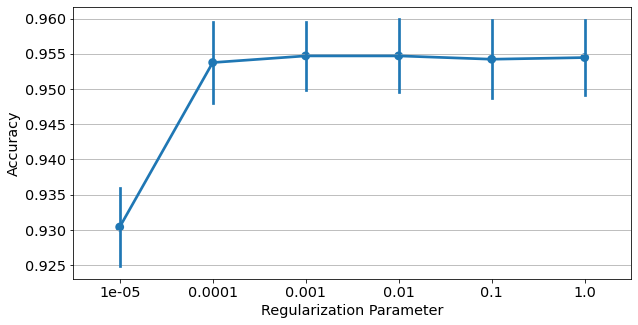

In [18]:
sns.pointplot(
    data=results,
    ci='sd'
)

xl = plt.xlabel('Regularization Parameter')
yl = plt.ylabel('Accuracy')

<div dir=rtl>
    בתרשים למעלה קיבלנו את הממוצע וסטיית התקן של חמש ריצות שונות של המודל על חמש חלוקות שונות של הדאטא. רווח הסמך שבחרנו לבקש מהמודל להציג הוא הסטיית תקן. כעת נוכל לבחור פרמטר בצורה מושכלת ומוצדקת.
</div>